# A Portrait of Higher Education in America 

### This is an analysis of trends in higher education in America, based on the open dataset in the Statistical Abstracts of America Series http://catalog.data.gov/dataset/statistical-abstract-of-the-united-states/resource/405ac4df-2782-4828-bef1-15a5aa82405c

In [903]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 8)
import heapq
pd.options.mode.chained_assignment = None  #

matplotlib.style.use('ggplot')
degree_by_Level_Sex = pd.read_excel('12s0299.xls')
degree_by_Level_Sex.drop(degree_by_Level_Sex.index[[0,1,2,3,4]], inplace=True)
degree_by_Level_Sex.columns=['Year','All_degrees', 'Percent_male', 'Associates_Male', 'Associates_Female',
                                   'Bachelors_Male','Bachelors_Female','Masters_Male','Masters_Female','First_Prof_Male',
                                   'First_Prof_Female','Doctoral_Male','Doctoral_Female']
degree_by_Level_Sex.drop(degree_by_Level_Sex.index[[40,41,42,43,44,45,46,47,48]], inplace=True)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## I, Degrees earned by level and Sex from 1975 to 2009
### The following section explores Degrees earned by level and Sex from 1975 to 2009. The total number of degrees increased three fold the four decades from 1970 to 2009 from one million to over three million, in all levels: Associates, Bachelors degree, Masters, First Professional and Doctoral. 

In [904]:
for i in np.arange(40)+5:
    degree_by_Level_Sex['Year'][i]=degree_by_Level_Sex['Year'][i][0:4]
degree_by_Level_Sex.head(10)

,Year,All_degrees,Percent_male,Associates_Male,Associates_Female,Bachelors_Male,Bachelors_Female,Masters_Male,Masters_Female,First_Prof_Male,First_Prof_Female,Doctoral_Male,Doctoral_Female
5,1970,1271,59.2,117.432,88.591,451.097,341.219,125.624,82.667,33.077,1.841,25.89,3.976
6,1971,1393,59.0093,144,108,476,364,138,92,36,2,28,5
7,1972,1508,58.7,166,126,501,387,150,102,41,3,28,5
8,1973,1587,58.2,175,141,518,404,154,109,46,4,29,6
9,1974,1654,57.4365,189,155,527,418,158,119,49,5,27,6
10,1975,1666,56,191.017,169.154,504.841,418.092,161.57,130.88,48.956,6.96,26.817,7.266
11,1976,1726,55.7,210,181,505,421,167,145,53,10,26,8
12,1977,1741,54.7,211,196,496,424,168,149,52,12,25,8
13,1978,1744,53.3,205,208,487,434,161,150,52,14,24,8
14,1979,1727,52.1,192,211,477,444,153,148,53,16,24,9


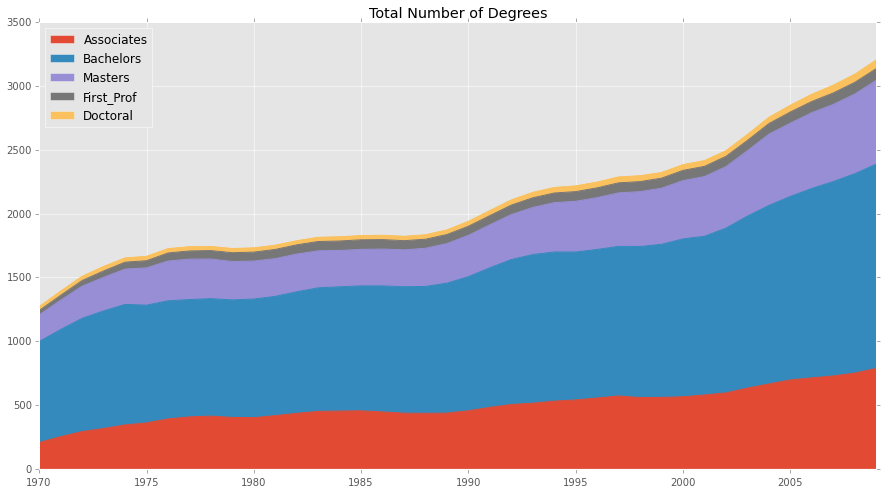

In [905]:

degree_by_Level_Sex['Associates']=degree_by_Level_Sex['Associates_Male']+degree_by_Level_Sex['Associates_Female']
degree_by_Level_Sex['Bachelors']=degree_by_Level_Sex['Bachelors_Male']+degree_by_Level_Sex['Bachelors_Female']
degree_by_Level_Sex['Masters']=degree_by_Level_Sex['Masters_Male']+degree_by_Level_Sex['Masters_Female']
degree_by_Level_Sex['First_Prof']=degree_by_Level_Sex['First_Prof_Male']+degree_by_Level_Sex['First_Prof_Female']
degree_by_Level_Sex['Doctoral']=degree_by_Level_Sex['Doctoral_Male']+degree_by_Level_Sex['Doctoral_Female']
degree_by_Level_Sex[['Associates','Bachelors','Masters','First_Prof','Doctoral']].plot.area()
plt.xticks( np.arange(8)*5+5,  np.arange(8)*5+1970 )
plt.title('Total Number of Degrees')

### The number of Associates and First-Professionals increased the most rapidly, almost four fold. 

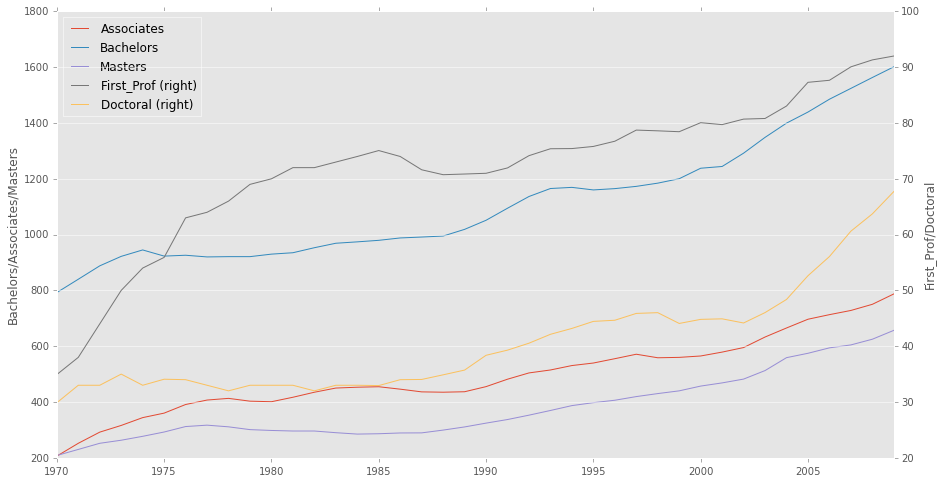

In [906]:
plt.figure()
ax = degree_by_Level_Sex[['Associates','Bachelors','Masters','First_Prof','Doctoral']].plot(secondary_y=['First_Prof', 'Doctoral'])
ax.set_ylabel('Bachelors/Associates/Masters')
ax.right_ax.set_ylabel('First_Prof/Doctoral')
plt.xticks( np.arange(8)*5+5,  np.arange(8)*5+1970 )
plt.show()

### Quite remarkably, females overtook males in all levels of higher education although they started at lower numbers in 1970. This change was most dramatic at the First Professional and Doctoral Levels, from a wide gap in 1970 to almost zero now. In the Bachelors, Associates and Masters levels, women caught up with men in the late 1970s and over took. The gap seemed to widen over time. 

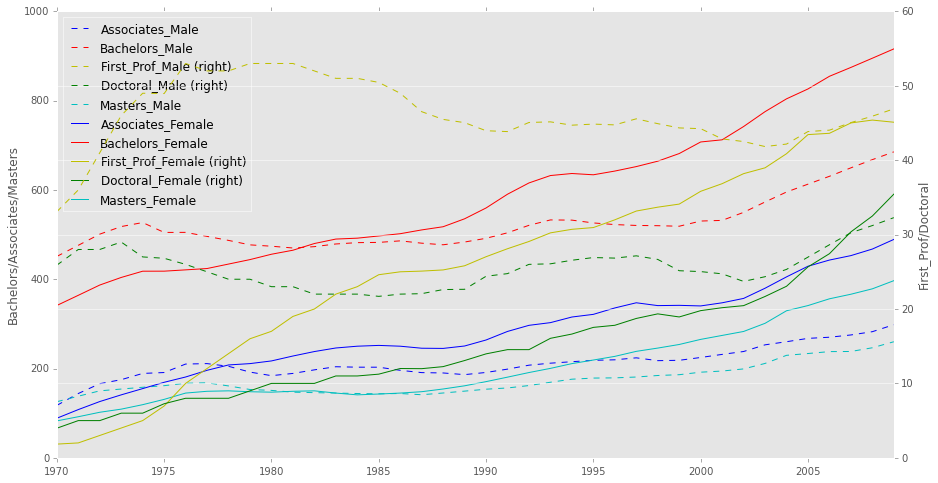

In [907]:
mystyle=['b--','r--','y--','g--','c--','b','r','y','g','c']
ax = degree_by_Level_Sex[['Associates_Male','Bachelors_Male','First_Prof_Male','Doctoral_Male','Masters_Male',
                         'Associates_Female','Bachelors_Female','First_Prof_Female','Doctoral_Female',
                          'Masters_Female']].plot(style = mystyle,secondary_y=['First_Prof_Male','First_Prof_Female',
                                                                             'Doctoral_Male','Doctoral_Female'])

ax.set_ylabel('Bachelors/Associates/Masters')
ax.right_ax.set_ylabel('First_Prof/Doctoral')
plt.xticks( np.arange(8)*5+5,  np.arange(8)*5+1970 )
plt.show()

### While the total number of degrees increased, especially rapidly in the 1990s, the percentage of males steadly decreased from 60% to 40%. 

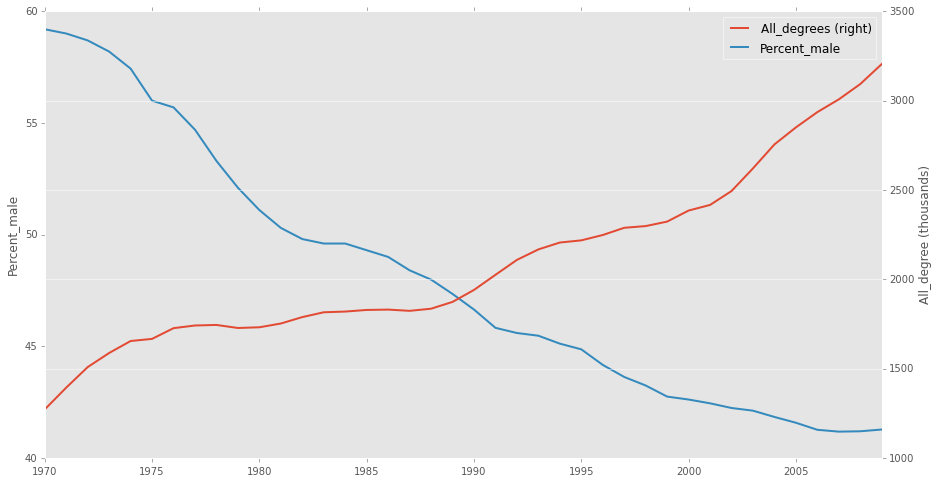

In [908]:
ax = degree_by_Level_Sex[['All_degrees','Percent_male']].plot(secondary_y=['All_degrees'],linewidth=2)

ax.set_ylabel('Percent_male')
ax.right_ax.set_ylabel('All_degree (thousands)')
plt.xticks( np.arange(8)*5+5,  np.arange(8)*5+1970 )
plt.show()

## II, Degrees by Levels and Ethnicity

In [909]:
a = pd.read_excel('12s0300.xls')
a.drop(a.index[[0,1,2,11,19,27,35,43,44,45,46,47,48,49,50]], inplace=True)
degree_by_Level_Ethnicity = a.transpose()
ass = [0]*7
bac = [0]*7
mas = [0]*7
doc = [0]*7
prof= [0]*7
for i in np.arange(7):
    ass[i] = str(degree_by_Level_Ethnicity[4][0][0:8])+str(degree_by_Level_Ethnicity[4+i][0])
    bac[i] = str(degree_by_Level_Ethnicity[12][0][0:8])+str(degree_by_Level_Ethnicity[12+i][0] )
    mas[i] = str(degree_by_Level_Ethnicity[20][0][0:8])+str(degree_by_Level_Ethnicity[20+i][0] )
    doc[i] = str(degree_by_Level_Ethnicity[28][0][0:8])+str(degree_by_Level_Ethnicity[28+i][0] )
    prof[i] =str(degree_by_Level_Ethnicity[36][0][0:8])+str(degree_by_Level_Ethnicity[36+i][0] )

degree_by_Level_Ethnicity.columns=[ 'Year']+ass + bac + mas + doc + prof

del degree_by_Level_Ethnicity["AssociatAssociate's degrees, total"]
del degree_by_Level_Ethnicity["BachelorBachelor's degrees, total"]
del degree_by_Level_Ethnicity["Master'sMaster's degrees, total"]
del degree_by_Level_Ethnicity['DoctoralDoctoral degrees, total']
del degree_by_Level_Ethnicity[ 'First-prFirst-professional degrees, total']
degree_by_Level_Ethnicity.drop(degree_by_Level_Ethnicity.index[[0]], inplace=True)

for i in np.arange(18):
    degree_by_Level_Ethnicity['Year'][i]=str(degree_by_Level_Ethnicity['Year'][i])[0:4]
    
degree_by_Level_Ethnicity.index = degree_by_Level_Ethnicity['Year']
degree_by_Level_Ethnicity.head(5)


,Year,"Associat..White, non-Hispanic","Associat..Black, non-Hispanic",Associat..Hispanic,Associat..Asian or Pacific Islander,Associat..American Indian/Alaskan Native,Associat..Nonresident alien,"Bachelor..White, non-Hispanic","Bachelor..Black, non-Hispanic",Bachelor..Hispanic,...,Doctoral..Hispanic,Doctoral..Asian or Pacific Islander,Doctoral..American Indian/Alaskan Native,Doctoral..Nonresident alien,"First-pr..White, non-Hispanic","First-pr..Black, non-Hispanic",First-pr..Hispanic,First-pr..Asian or Pacific Islander,First-pr..American Indian/Alaskan Native,First-pr..Nonresident alien
Year,,,,,,,,,,,,,,,,,,,,,
1981,1981,339167,35330,17800,8650,2584,6643,807319,60673,21832,...,456,877,130,4203,64551,2931,1541,1456,192,669
1985,1985,355343,35791,19407,9914,2953,6407,826106,57473,25874,...,677,1106,119,5317,63219,3029,1884,1816,248,861
1990,1990,376816,34326,21504,13066,3430,5960,887151,61046,32829,...,780,1225,98,8898,60487,3409,2425,3362,257,1048
1995,1995,420656,47067,35962,20677,5482,9847,914610,87236,54230,...,984,2689,130,11130,59402,4747,3231,6396,413,1611
2000,2000,408772,60221,51573,27782,6497,10088,929106,108013,75059,...,1305,2420,160,10834,59637,5555,3865,8584,564,1852


### The number of bachelors in all ethnic groups went up, most rapidly in the Black, Hispanic and Asian groups. 

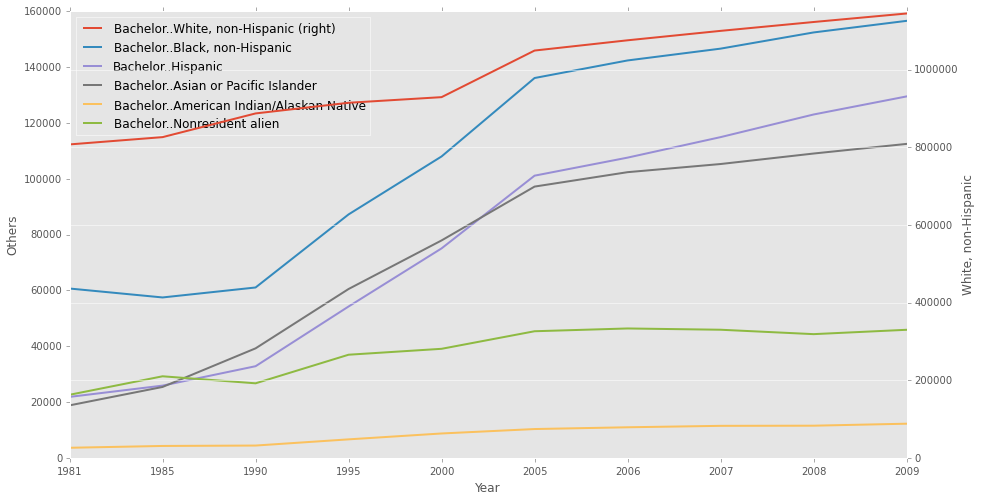

In [910]:
A=degree_by_Level_Ethnicity.head(10)
ax = A[bac[1:]].plot(secondary_y=bac[1],linewidth=2)
ax.right_ax.set_ylim([0, 1150000])
ax.right_ax.set_ylabel('White, non-Hispanic')
ax.set_ylabel('Others')



## III, Bachelor degrees by Field

In [911]:
a = pd.read_excel('12s0302.xls')
a.drop(a.index[[0,1,3,4,10,12,13,18,24,30,36,42,45,46,47,48,49,50,51,52,53]], inplace=True)
bac_deg_by_field = a.transpose()
bac_deg_by_field.columns=list(bac_deg_by_field[:1].values.flatten())
bac_deg_by_field.columns.values[0]='Year'
bac_deg_by_field.drop(bac_deg_by_field.index[[0]], inplace=True)
bac_deg_by_field.index = bac_deg_by_field['Year']
bac_deg_by_field['Year']
bac_deg_by_field.head(5)


,Year,Agriculture and natural resources,Architecture and related services,"Area, ethnic, cultural, and gender studies",Biological and biomedical sciences,Business,"Communication, journalism, and related programs \2",Computer and information sciences,Education,Engineering and engineering technologies,...,Philosophy and religious studies,Physical sciences and science technologies,Precision production,Psychology,Public administration and social services,Security and protective services,Social sciences and history,Theology and religious vocations,Transportation and materials moving,Visual and performing arts
Year,,,,,,,,,,,,,,,,,,,,,
1980.0,1980,22802,9132,2840,46190,186264,28616,11154,118038,69387,...,7069,23407,0,42093,16644,15015,103662,6170,213,40892
1990.0,1990,12900,9364,4447,37204,248568,51572,27347,105112,82480,...,7034,16056,6,53952,13908,15354,118083,5185,2387,39934
2000.0,2000,24238,8462,6212,63005,256070,57058,37788,108034,73419,...,8535,18331,33,74194,20185,24877,127101,6789,3395,58791
2003.0,2003,23294,9054,6629,60072,293545,69792,57439,105790,77267,...,10344,17940,42,78613,19878,26189,143218,7926,4567,71474
2004.0,2004,22835,8838,7181,61509,307149,73002,59488,106278,78227,...,11152,17983,61,82098,20552,28175,150357,8126,4824,77181


### As of 2009, the six most popular degrees are: Visual and performing arts, Social sciences and history, Psychology, Education, Health and Business. The number of degrees in Education actually decreased. 

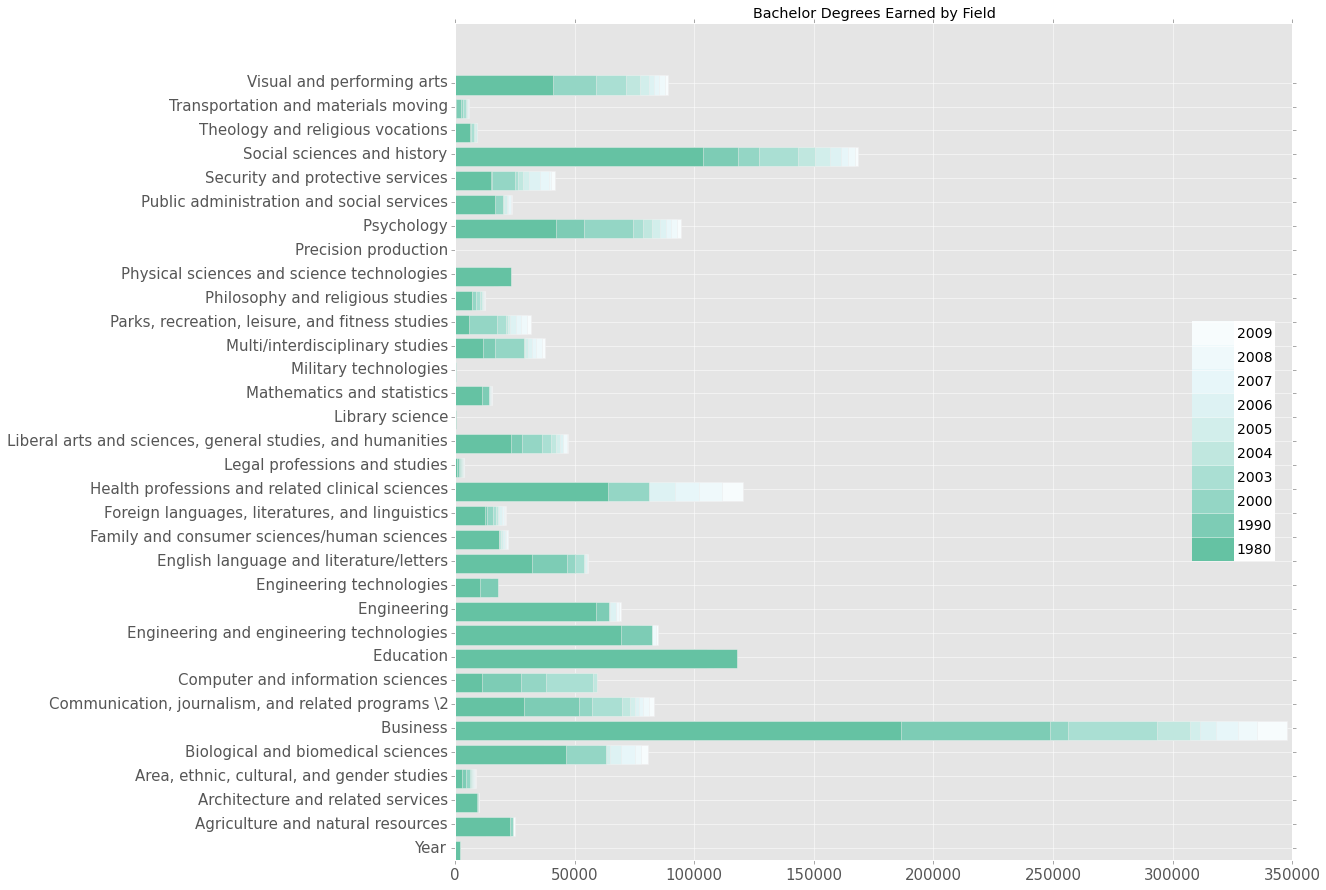

In [912]:
plt.figure(figsize=(15,15))
colors = plt.cm.BuGn(np.linspace(0, 0.5, 10))
#del bac_deg_by_field['Year']
n_rows=10
index = np.arange(len(bac_deg_by_field.columns.values))
table_vals=[['2009'],['2008'],['2007'],['2006'],['2005'],['2004'],['2003'],['2000'],['1990'],['1980']]
# the rectangle is where I want to place the table
the_table = plt.table(cellText=table_vals,
                  colWidths = [0.1],
                  rowColours=colors,
                  loc='center right')
for key, cell in the_table.get_celld().items():
    cell.set_linewidth(0)
the_table.set_fontsize(20)
the_table.scale(0.5, 2)
for row in range(n_rows):
    plt.barh(index, bac_deg_by_field.iloc[9-row,:], color=colors[row])
plt.yticks([i+0.5 for i in index], bac_deg_by_field.columns.values,fontsize = 15)
plt.title('Bachelor Degrees Earned by Field')
plt.xticks(fontsize=15)
plt.show()

### The most popular fields at the masters level are Education and Business. 

In [ ]:
MD = pd.read_excel('12s0303.xls')

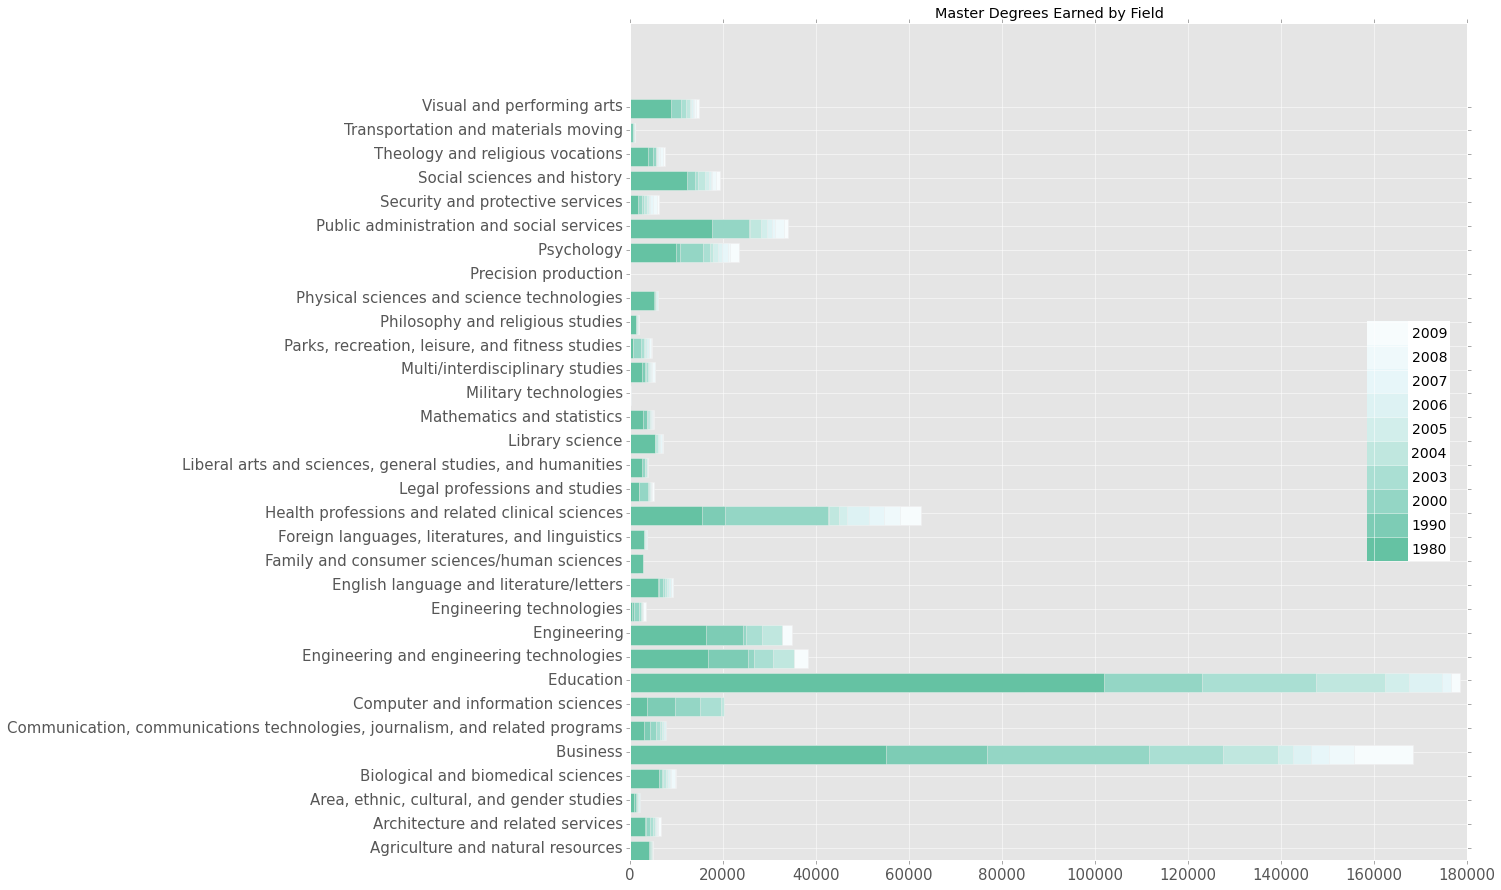

In [927]:
mas_deg_by_field = MD.iloc[:46,:]
mas_deg_by_field.drop(mas_deg_by_field.index[[0,1,3,4,5,11,13,14,19,25,31,37,43]], inplace=True)
mas_deg_by_field=mas_deg_by_field.transpose()
mas_deg_by_field.columns=list(mas_deg_by_field[:1].values.flatten())
mas_deg_by_field.columns.values[0]='Year'
mas_deg_by_field.drop(mas_deg_by_field.index[[0]], inplace=True)
mas_deg_by_field.index = mas_deg_by_field['Year']

plt.figure(figsize=(15,15))
colors = plt.cm.BuGn(np.linspace(0, 0.5, 10))
del mas_deg_by_field['Year']
n_rows=10
index = np.arange(len(mas_deg_by_field.columns.values))
table_vals=[['2009'],['2008'],['2007'],['2006'],['2005'],['2004'],['2003'],['2000'],['1990'],['1980']]
# the rectangle is where I want to place the table
the_table = plt.table(cellText=table_vals,
                  colWidths = [0.1],
                  rowColours=colors,
                  loc='center right')
the_table.set_fontsize(20)
the_table.scale(0.5, 2)
for key, cell in the_table.get_celld().items():
    cell.set_linewidth(0)
for row in range(n_rows):
    plt.barh(index, mas_deg_by_field.iloc[9-row,:], color=colors[row])
plt.yticks([i+0.5 for i in index], mas_deg_by_field.columns.values,fontsize = 15)
plt.xticks(fontsize=15)
plt.title('Master Degrees Earned by Field')
plt.show()

### Most doctoral degrees are in the following fields: Social Sciences and History, Psychology, Physical Sciences, Health, Engineering, Education and Biological Sciences. 

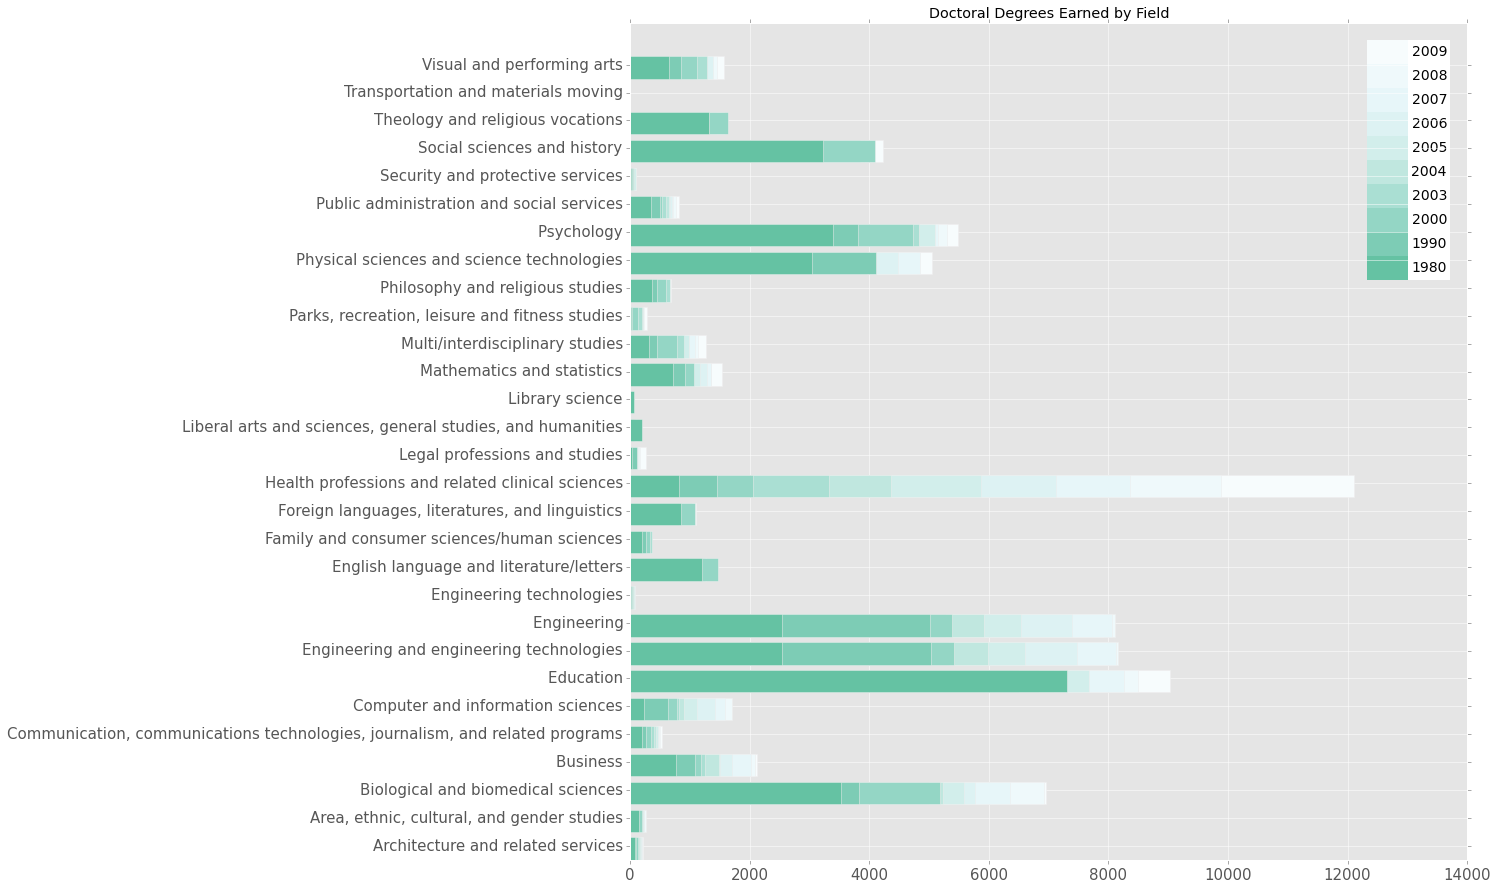

In [928]:
doc_deg_by_field = MD.iloc[52:89,:]
doc_deg_by_field
doc_deg_by_field.drop(doc_deg_by_field.index[[5,7,8,13,19,25,31]], inplace=True)
doc_deg_by_field=doc_deg_by_field.transpose()
doc_deg_by_field.columns=list(doc_deg_by_field[:1].values.flatten())
doc_deg_by_field.columns.values[0]='Year'
doc_deg_by_field.drop(doc_deg_by_field.index[[0]], inplace=True)
doc_deg_by_field.index = doc_deg_by_field['Year']

plt.figure(figsize=(15,15))
colors = plt.cm.BuGn(np.linspace(0, 0.5, 10))
del doc_deg_by_field['Year']
n_rows=10
index = np.arange(len(doc_deg_by_field.columns.values))
table_vals=[['2009'],['2008'],['2007'],['2006'],['2005'],['2004'],['2003'],['2000'],['1990'],['1980']]
# the rectangle is where I want to place the table
the_table = plt.table(cellText=table_vals,
                  colWidths = [0.1],
                  rowColours=colors,
                  loc='upper right')
the_table.set_fontsize(20)
the_table.scale(0.5, 2)
for key, cell in the_table.get_celld().items():
    cell.set_linewidth(0)
for row in range(n_rows):
    plt.barh(index, doc_deg_by_field.iloc[9-row,:], color=colors[row])
plt.yticks([i+0.5 for i in index], doc_deg_by_field.columns.values,fontsize = 15)
plt.xticks(fontsize=15)
plt.title('Doctoral Degrees Earned by Field')
plt.show()

### The number of Doctorate degrees remained small relative to the number of Masters degrees. 

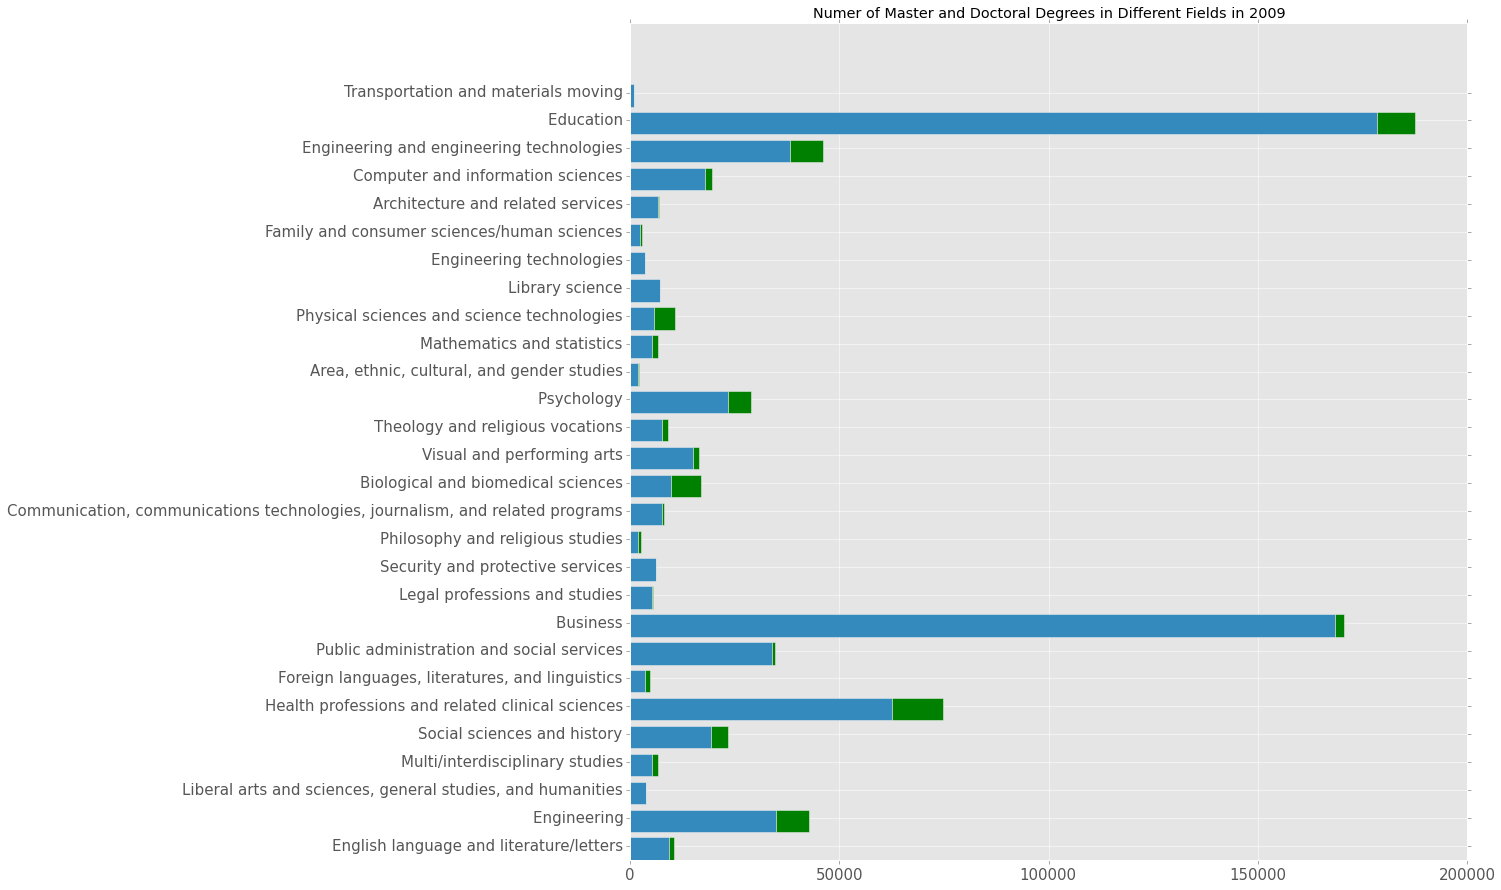

In [929]:
plt.figure(figsize=(15,15))
common_fields=list(set(doc_deg_by_field.columns.values) & set(mas_deg_by_field.columns.values))
common_fields
index=np.arange(len(common_fields))
plt.barh(index, mas_deg_by_field[common_fields].iloc[9,:] )
plt.barh(index, doc_deg_by_field[common_fields].iloc[9,:], left = mas_deg_by_field[common_fields].iloc[9,:], color='g')

plt.yticks([i+0.5 for i in index], common_fields,fontsize = 15)
plt.title('Numer of Master and Doctoral Degrees in Different Fields in 2009')
plt.xticks(fontsize=15)
plt.show()

## IV, The cost of higher education 

### The price of higher education has rocketed more than ten times in all institutions. 

In [930]:
tuition=pd.read_excel('12s0293.xls')
tuition = tuition.ix[:,:5]
tuition.columns = ['Year', 'All Institutions', '2 yr Colleges', '4 yr universities', 'Other 4 year Schools']
public_tuition = tuition.iloc[5:46,:]
public_tuition.index = np.arange(1970,2011,1)
private_tuition = tuition.iloc[48:89,:]
private_tuition.index = np.arange(1970,2011,1)

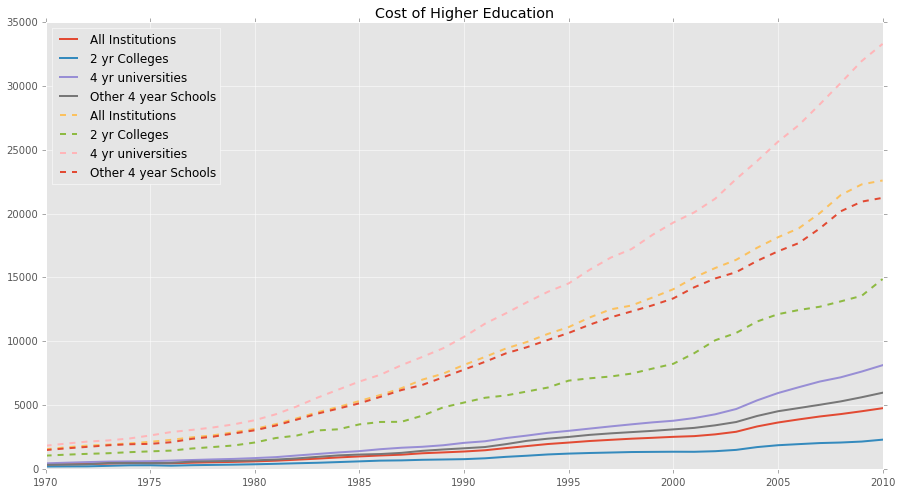

In [931]:
all_tuition= pd.concat([public_tuition,private_tuition.iloc[:,1:]], axis=1)
ax = public_tuition.plot(linewidth=2)
private_tuition.plot(ax=ax,linewidth=2, style='--')
plt.title('Cost of Higher Education')
plt.show()

### People in the age group 18 years and younger spend the most on college education. This spending decreases with age but it seems that people over 40 years spend more money on retraining by obtaining college education. 

In [932]:
college_cost = pd.read_excel('12s0288.xls')
college_cost = college_cost.iloc[:12,:]
college_cost.drop(college_cost.index[0:7], inplace=True)
college_cost.columns=['Age group', 'All Institutions','Public 2 year', 'Public 4yr Non-doctorate', 'Public 4yr Doctorate',
                       'Private Not-For-Profit 4 yr Non-doctorate','Private Not-For-Profit 4 yr Doctorate' , 'Private for-profit']
college_cost

,Age group,All Institutions,Public 2 year,Public 4yr Non-doctorate,Public 4yr Doctorate,Private Not-For-Profit 4 yr Non-doctorate,Private Not-For-Profit 4 yr Doctorate,Private for-profit
7,..18 years or younger,17064.5,12629.6,16663.5,19888.2,32586.3,38311.4,19868.4
8,..19 to 23 years,16059.1,6829.5,10128,12512.6,17860.7,22539.9,20375.6
9,..24 to 29 years,11550.5,8034.8,11187.9,13833.2,17822.9,21293.8,20275
10,..30 to 39 years,10993.7,3854.4,5738.9,7319.4,8445.9,10419.4,21304.7
11,..40 years or older,9268.8,8268,14911.5,18501.1,31809.2,37580.5,21264.9


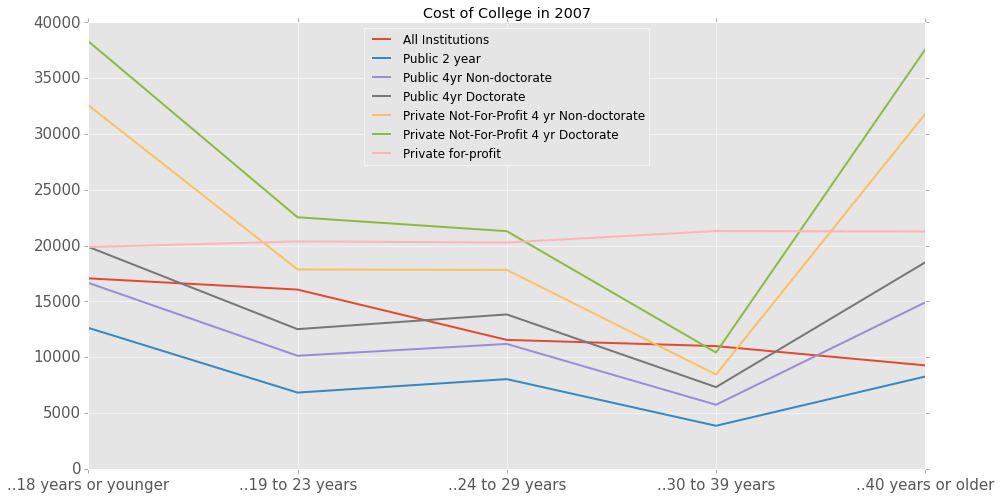

In [933]:
ax = college_cost.plot(linewidth=2)
plt.xticks(college_cost.index ,  list(college_cost['Age group']), fontsize=15 )
plt.yticks(fontsize=15)
ax.legend(loc='best')
plt.title('Cost of College in 2007')
plt.show()

## College faculty salary at private institutions are consistently 20% than that at public institutions. 

In [934]:
college_salary = pd.read_excel('12s0295.xls')
college_salary = college_salary.iloc[0:14,:]
college_salary.drop(college_salary.index[[0,1,8]], inplace=True)
college_salary=college_salary.transpose()
for i in [2,3,4,5]:
    college_salary.iloc[0,i] = 'Public'+ str(college_salary.iloc[0,i])
for i in [7,8,9,10]:
    college_salary.iloc[0,i] = 'Private'+ str(college_salary.iloc[0,i])
college_salary[:1][2]='Year'
college_salary.columns=list(college_salary[:1].values.flatten())
college_salary.index = college_salary['Year']
college_salary.drop(college_salary.index[[0]], inplace=True)
del college_salary['Year']
college_salary

,Public: All ranks,Public..Professor,Public..Associate professor,Public..Assistant professor,Public..Instructor,Private: \1 All ranks,Private..Professor,Private..Associate professor,Private..Assistant professor,Private..Instructor
Year,,,,,,,,,,
2005.0,66.9,88.5,64.4,54.3,39.4,79.3,108.2,71,59.4,42.2
2006.0,68.4,91.4,66.3,55.9,40.1,81.5,111.8,73.3,61,44.5
2007.0,71.4,95.6,69.2,58.5,41.8,84.2,116.2,75.7,62.9,45.6
2008.0,73.2,98.3,72.2,60.8,43.4,88.2,122.2,79.2,65.8,49.9
2009.0,77,104.5,75.2,63.4,44.7,92.3,128.3,82.9,69,51.6
2010.0,78,105.7,75.7,64,46.5,92.9,128.7,82.9,69.5,52.8
2011.0,78.3,105.8,76.2,64.7,45.7,94.6,131.6,84.6,71,53.6


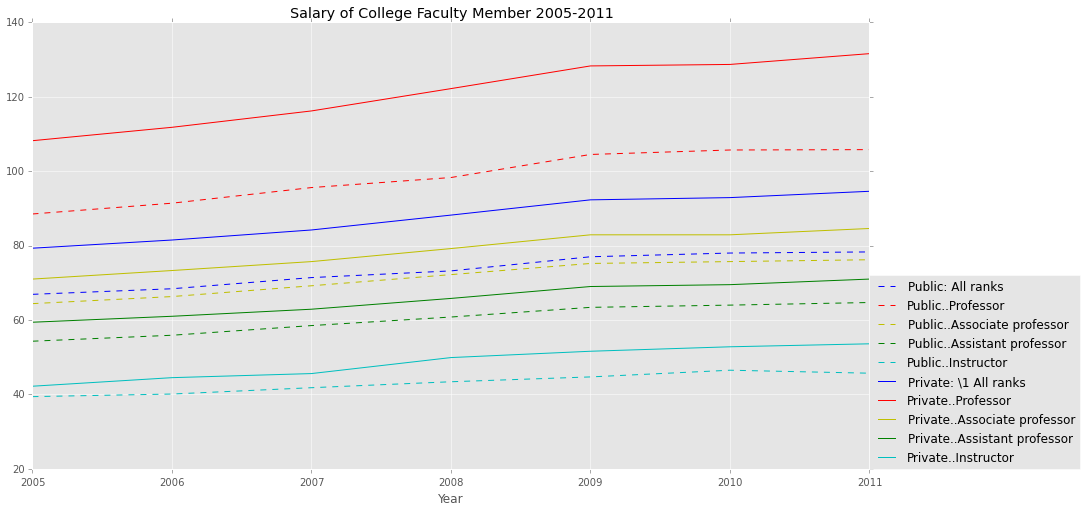

In [935]:
mystyle=['b--','r--','y--','g--','c--','b','r','y','g','c']
ax = college_salary.plot(style = mystyle)
plt.xticks( np.arange(7)+2005,   np.arange(7)+2005 )
ax.legend(loc=(1,0))
plt.title('Salary of College Faculty Member 2005-2011')
plt.show()

### Administrative salaries and Fringe benefits have gone up more rapidly than faculty salaries (100 is in 1983).

In [936]:
he_price_indexes = pd.read_excel('12s0290.xls')
he_price_indexes = he_price_indexes.iloc[:14,:]
he_price_indexes.drop(he_price_indexes.index[0:5], inplace=True)
he_price_indexes.columns=['Year','Total','Faculty Salaries', 'Administrative Salaries', 'Clerical Salaries',
                         'Service Employees Salaries', 'Fringe Benefits', 'Misc Services', 'Supplies', 'Utilities']
he_price_indexes.index=he_price_indexes['Year']
del he_price_indexes['Year']
he_price_indexes

,Total,Faculty Salaries,Administrative Salaries,Clerical Salaries,Service Employees Salaries,Fringe Benefits,Misc Services,Supplies,Utilities
Year,,,,,,,,,
2002,212.7,222.7,236.4,205.4,189.6,277.1,205.8,128.2,118.1
2003,223.5,229.4,255.7,211.1,193.9,292.3,209.5,132.2,157.6
2004,231.7,234.2,263.3,217.1,197.6,312.8,216.4,135.6,176.4
2005,240.8,240.7,274,223.4,201.4,327.2,222.7,145.5,200.2
2006,253.1,248.2,287.7,229.5,205.5,343.7,228.8,158.1,255.7
2007,260.3,257.6,299.2,237.7,213.6,360.8,238.3,165.3,220.6
2008,273.2,268.1,314,245,220.4,380.7,246.5,180,252
2009,279.3,277.3,330.9,251.6,226.7,394.4,253.1,181.6,213.8
2010,281.8,280.6,337.6,255.2,230,402.8,255.8,179.3,193.6


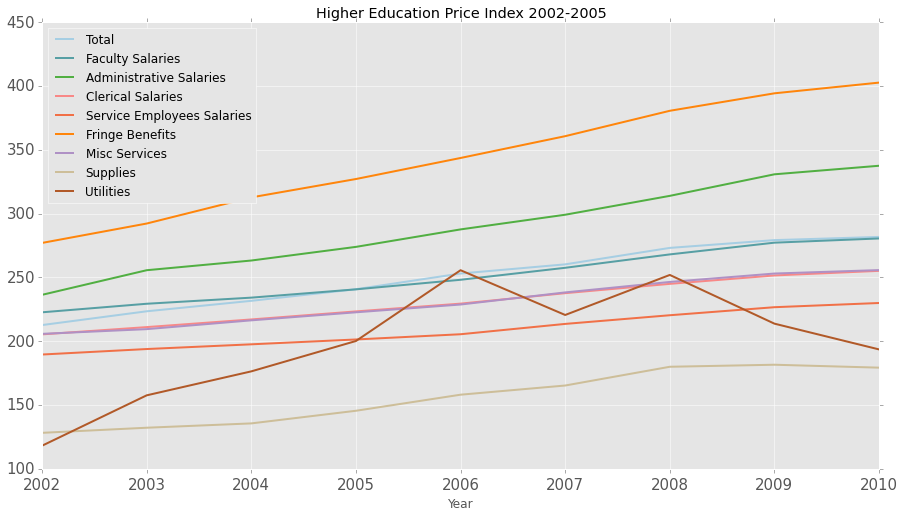

In [937]:
ax = he_price_indexes.plot(colormap='Paired',linewidth=2)
plt.xticks( fontsize=15 )
plt.yticks(fontsize=15)
ax.legend(loc='best')
plt.title('Higher Education Price Index 2002-2005')
plt.show()

### Higher education institutions rely increasingly on part-time staff. 

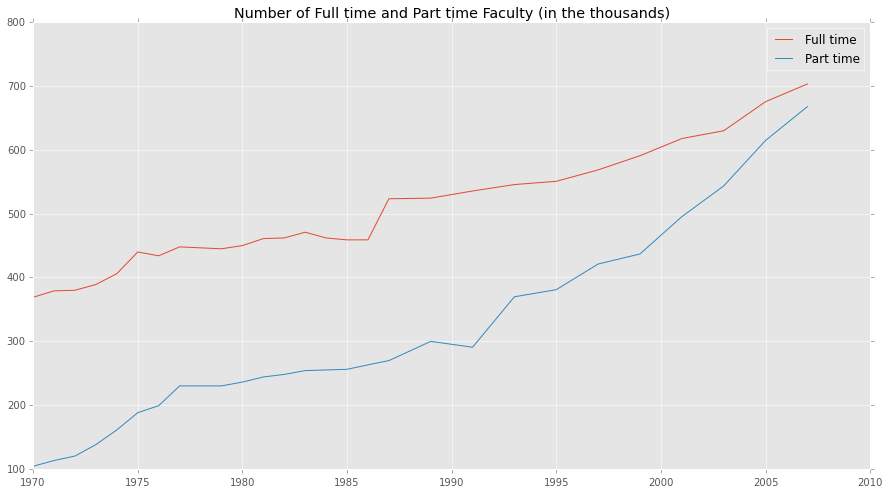

In [938]:
staff = pd.read_excel('12s0297.xls')
for i in np.arange(4,31,1):
    if type(staff.iloc[i,0])!= int:
        staff.iloc[i,0]=int(staff.iloc[i,0][0:4])
plt.plot(staff.iloc[4:31,0], staff.iloc[4:31,2])
plt.plot(staff.iloc[4:31,0], staff.iloc[4:31,3])
plt.legend(['Full time', 'Part time'])
plt.title('Number of Full time and Part time Faculty (in the thousands)')
plt.show()

## V, Federal support for Higher Education 
### Apart from Federal Family Education Loans and Federal Perkins Loans, other types of Federal assistance all went up. Federal Direct Student Loan rose rapidly sevent times after 2008 and ballooned to 120 billion dollars in 2011. The second largest type of Loan is Work Study, at 60 billion dollars.  

In [939]:
a = pd.read_excel('12s0291.xls')
a.columns= list(a.iloc[2,:].values.flatten())
a.columns.values[12]='2010'
a.columns.values[13]='2011'

n_grants=a.iloc[19:28,:]
av_award=a.iloc[32:41,]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


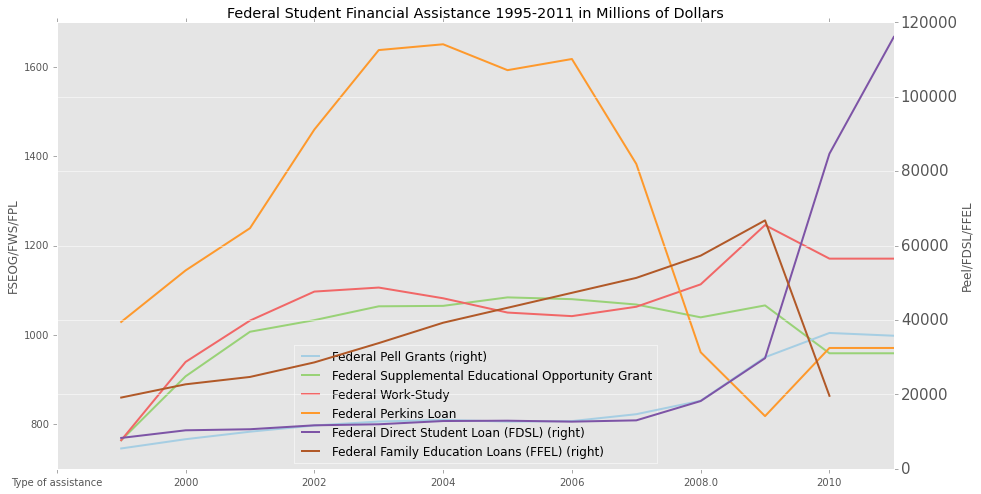

In [940]:
aid = a.iloc[6:15,:]
aid.drop(aid.index[[1,2,3]], inplace=True)
aid = aid.transpose()
aid.columns=list(aid[:1].values.flatten())
aid=aid.convert_objects(convert_numeric=True)
ax = aid.plot(colormap='Paired',linewidth=2,secondary_y=['Federal Pell Grants','Federal Direct Student Loan (FDSL)','Federal Family Education Loans (FFEL)'])
plt.xticks(fontsize=15 )
plt.yticks(fontsize=15)
ax.set_ylabel('FSEOG/FWS/FPL')
ax.right_ax.set_ylabel('Peel/FDSL/FFEL')
#ax.legend(loc=(0,0.6))
plt.title('Federal Student Financial Assistance 1995-2011 in Millions of Dollars')
plt.show()

### The number of grants follow the same trend. 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


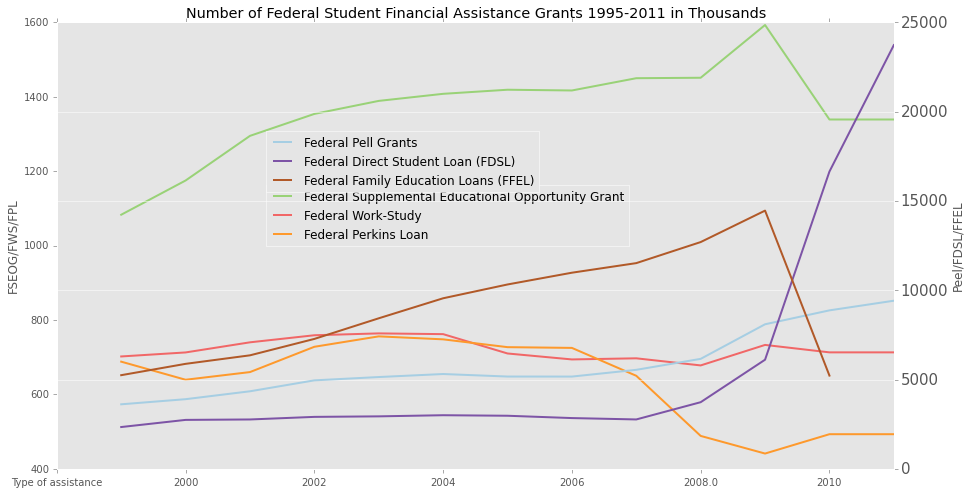

In [941]:
n_grants=a.iloc[19:28,:]
n_grants.drop(n_grants.index[[1,2,3]], inplace=True)
n_grants = n_grants.transpose()
n_grants.columns=list(n_grants[:1].values.flatten())
n_grants=n_grants.convert_objects(convert_numeric=True)
ax = n_grants.plot(colormap='Paired',linewidth=2,secondary_y=['Federal Pell Grants','Federal Direct Student Loan (FDSL)','Federal Family Education Loans (FFEL)'])
plt.xticks(fontsize=15 )
plt.yticks(fontsize=15)
ax.set_ylabel('FSEOG/FWS/FPL')
ax.right_ax.set_ylabel('Peel/FDSL/FFEL')
ax.legend(loc=(0.25,0.5))
ax.right_ax.legend(loc=(0.25,0.62))
plt.title('Number of Federal Student Financial Assistance Grants 1995-2011 in Thousands')
plt.show()

### Apart from Federal Supplemental Education Opportunity Grant, the average size of all other types of loans went up. 

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


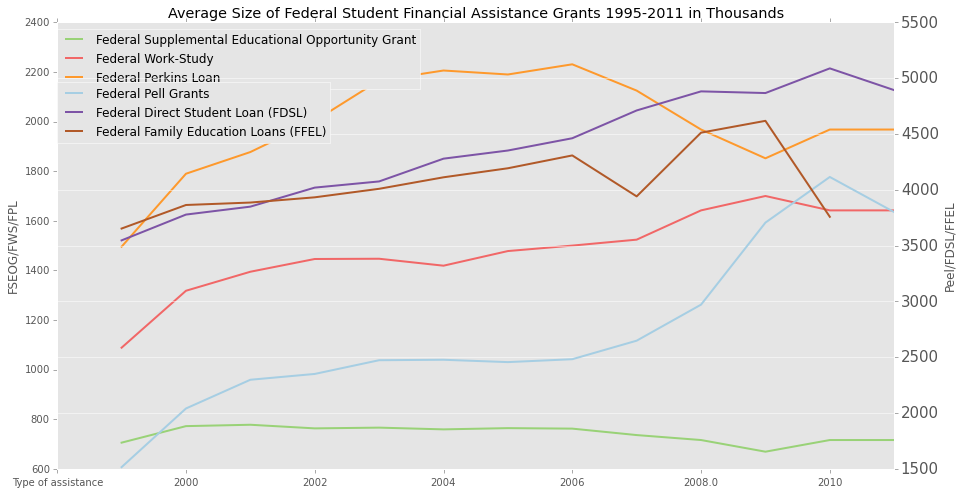

In [942]:
av_award=a.iloc[32:41,]
av_award.drop(av_award.index[[1,2,3]], inplace=True)
av_award = av_award.transpose()
av_award.columns=list(av_award[:1].values.flatten())
av_award=av_award.convert_objects(convert_numeric=True)
ax = av_award.plot(colormap='Paired',linewidth=2,secondary_y=['Federal Pell Grants','Federal Direct Student Loan (FDSL)','Federal Family Education Loans (FFEL)'])
plt.xticks(fontsize=15 )
plt.yticks(fontsize=15)
ax.set_ylabel('FSEOG/FWS/FPL')
ax.right_ax.set_ylabel('Peel/FDSL/FFEL')
ax.legend(loc=(0,0.85))
ax.right_ax.legend(loc=(0,0.73))
plt.title('Average Size of Federal Student Financial Assistance Grants 1995-2011 in Thousands')
plt.show()

## VI,  State support for Higher Education 

## The states with the highest number of students are California, Texas, Florida. The states with the lowest number of students are Vermont, Alaska and Wyoming. 

In [963]:
a = pd.read_excel('12s0292.xls')
us_states=pd.read_csv('usa-states.csv')
a = a.convert_objects(convert_numeric=True)
a = a.iloc[:55, :]
a.drop(a.index[[0,1,2,3,4]], inplace=True)
a.columns=['State','Full-time Enrollments (thousands)', 'Educational Appropriations (millions $)', 'Education Appropriations per full time student',
          'Total State and Local Appropriations','Net Tuition', 'Net Tuition as Percent of Total Education Revenue']
state_investment = a
state_investment.head(5)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


,State,Full-time Enrollments (thousands),Educational Appropriations (millions $),Education Appropriations per full time student,Total State and Local Appropriations,Net Tuition,Net Tuition as Percent of Total Education Revenue
5,Alabama,203.976,1137.010562,5574.236979,0.139894,1111.065080,0.517576
6,Alaska,20.271,302.853868,14940.252972,0.030748,106.350885,0.259897
7,Arizona,251.574,1673.804800,6653.329835,0.085935,1254.323700,0.439761
8,Arkansas,121.359,705.599663,5814.151921,0.095598,451.541264,0.416807
9,California,1926.353,11683.824350,6065.256134,0.074323,3494.710000,0.230240


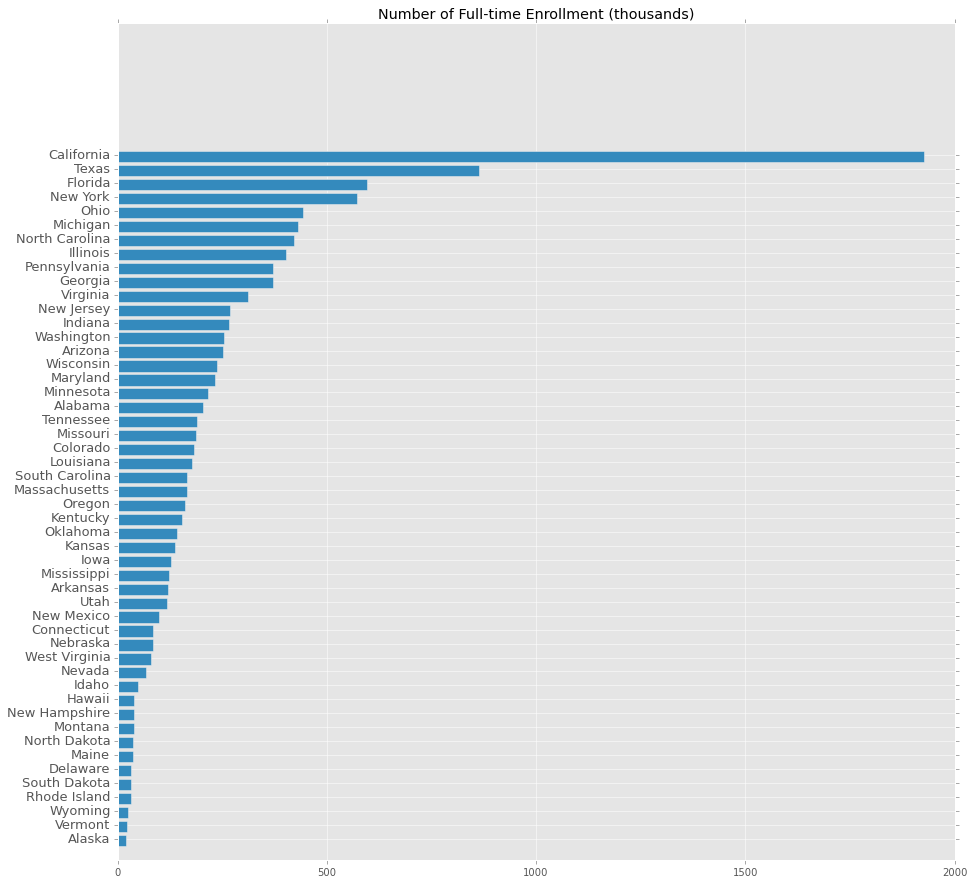

In [964]:
b = list(state_investment['Full-time Enrollments (thousands)'].astype(float))
ind= sorted(range(len(b)), key=lambda k: -b[k])
b.sort(reverse=True)
plt.figure(figsize=(15,15))
index=np.arange(50)
plt.barh([50-i for i in index], b)
plt.yticks([50-i+0.5 for i in index], [list(state_investment['State'])[i] for i in ind],fontsize = 13)
plt.title('Number of Full-time Enrollment (thousands)')
plt.show()

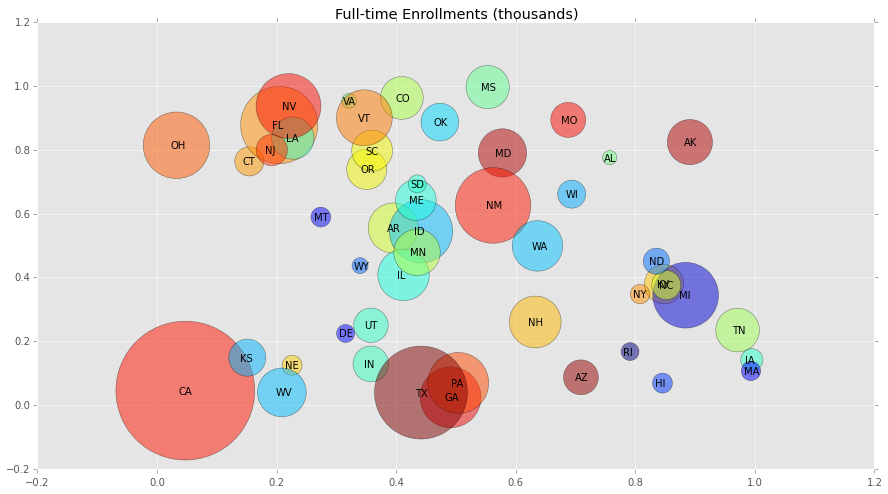

In [945]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.array(state_investment['Full-time Enrollments (thousands)'].astype(float))
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, s=area*10  ,edgecolor='k', c=colors, alpha=0.5)
for i in arange(50):
    ax.annotate(us_states['StateCode'][i], xy=(x[i], y[i]), xytext=(x[i]-0.01, y[i]-0.01))
plt.title('Full-time Enrollments (thousands)')
plt.show()

### North Dakota, California and Kansas have the highest percentage of population as students. 

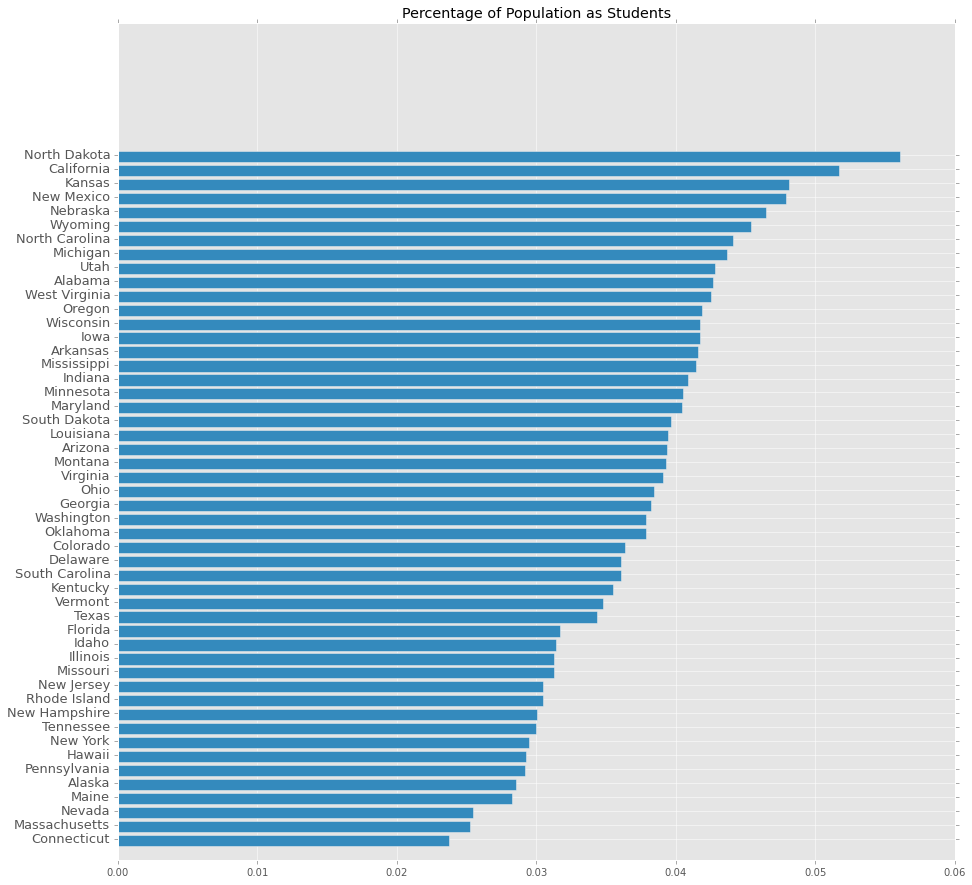

In [965]:
state_pop=pd.read_excel('state_population.xls')
a = list(state_pop['Population'].astype(float))
b= list(state_investment['Full-time Enrollments (thousands)'].astype(float))
from __future__ import division
c = [y/x*1000 for x, y in zip(a, b)]
ind= sorted(range(len(c)), key=lambda k: -c[k])
c.sort(reverse=True)
plt.figure(figsize=(15,15))
plt.barh([50-i for i in index], c)
plt.yticks([50-i+0.5 for i in index], [list(state_investment['State'])[i] for i in ind],fontsize = 13)
plt.title('Percentage of Population as Students')
plt.show()

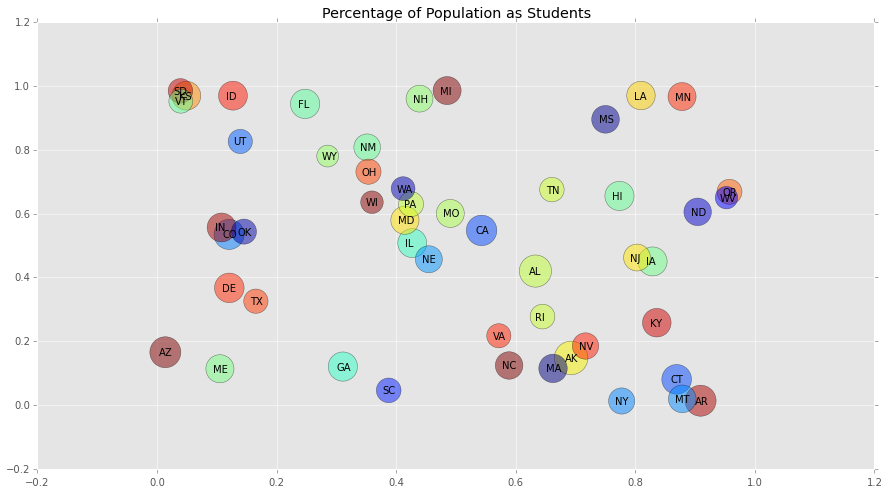

In [966]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, s=np.array(c)*20000 ,edgecolor='k', c=colors, alpha=0.5)
for i in arange(50):
    ax.annotate(us_states['StateCode'][i], xy=(x[i], y[i]), xytext=(x[i]-0.01, y[i]-0.01))
plt.title('Percentage of Population as Students')
plt.show()

### Alaska, Wyoming and Hawaii have the highest education appropriates per full time student. 

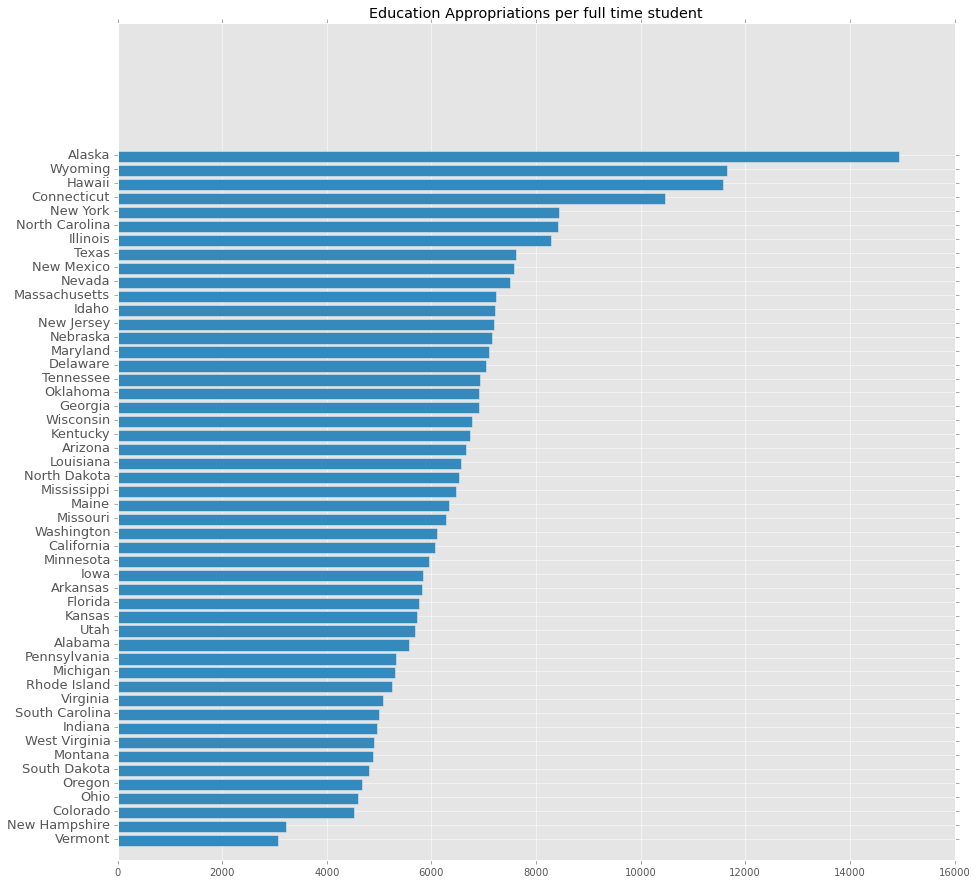

In [967]:
b = list(state_investment['Education Appropriations per full time student'].astype(float))
ind= sorted(range(len(b)), key=lambda k: -b[k])
b.sort(reverse=True)
plt.figure(figsize=(15,15))
plt.barh([50-i for i in index], b)
plt.yticks([50-i+0.5 for i in index], [list(state_investment['State'])[i] for i in ind],fontsize = 13)
plt.title('Education Appropriations per full time student')
plt.show()

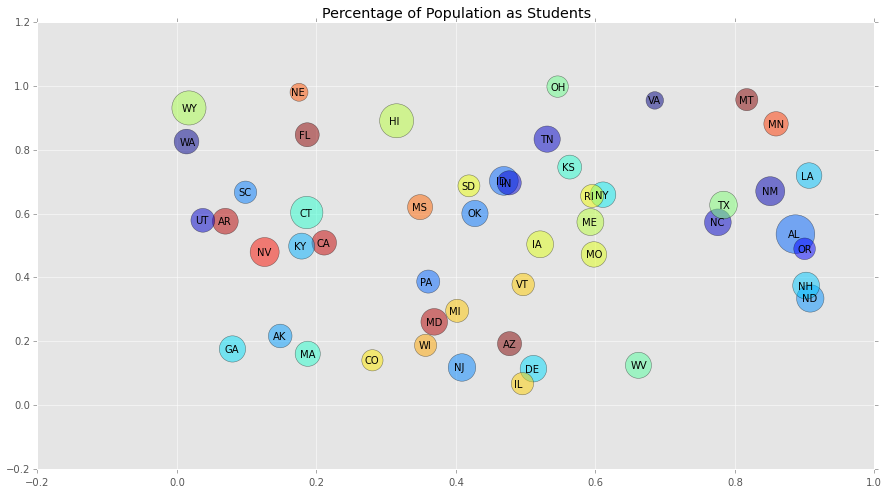

In [968]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
fig = plt.figure()
ax = fig.add_subplot(111)
area = np.array(state_investment['Education Appropriations per full time student'].astype(float))
ax.scatter(x, y, s=area*0.1  ,edgecolor='k', c=colors, alpha=0.5)
for i in arange(50):
    ax.annotate(us_states['StateCode'][i], xy=(x[i], y[i]), xytext=(x[i]-0.01, y[i]-0.01))
plt.title('Percentage of Population as Students')
plt.show()

### New Mexico, Alabama and North Carolina invest the most as percentage of state revenue. 

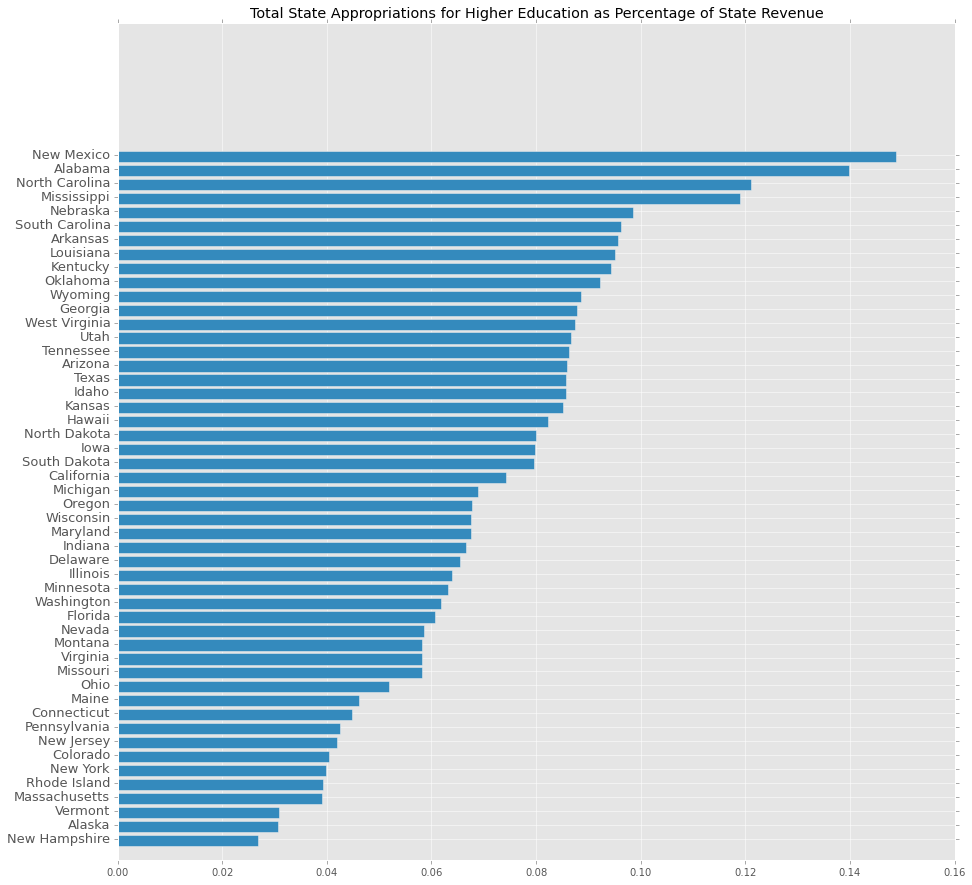

In [969]:
b = list(state_investment['Total State and Local Appropriations'].astype(float))
ind= sorted(range(len(b)), key=lambda k: -b[k])
b.sort(reverse=True)
plt.figure(figsize=(15,15))
plt.barh([50-i for i in index], b)
plt.yticks([50-i+0.5 for i in index], [list(state_investment['State'])[i] for i in ind],fontsize = 13)
plt.title('Total State Appropriations for Higher Education as Percentage of State Revenue')
plt.show()

### Large states such as Michigan, California, Texas, Pennsylvania have the highest total tuition of around three billion dollars.  

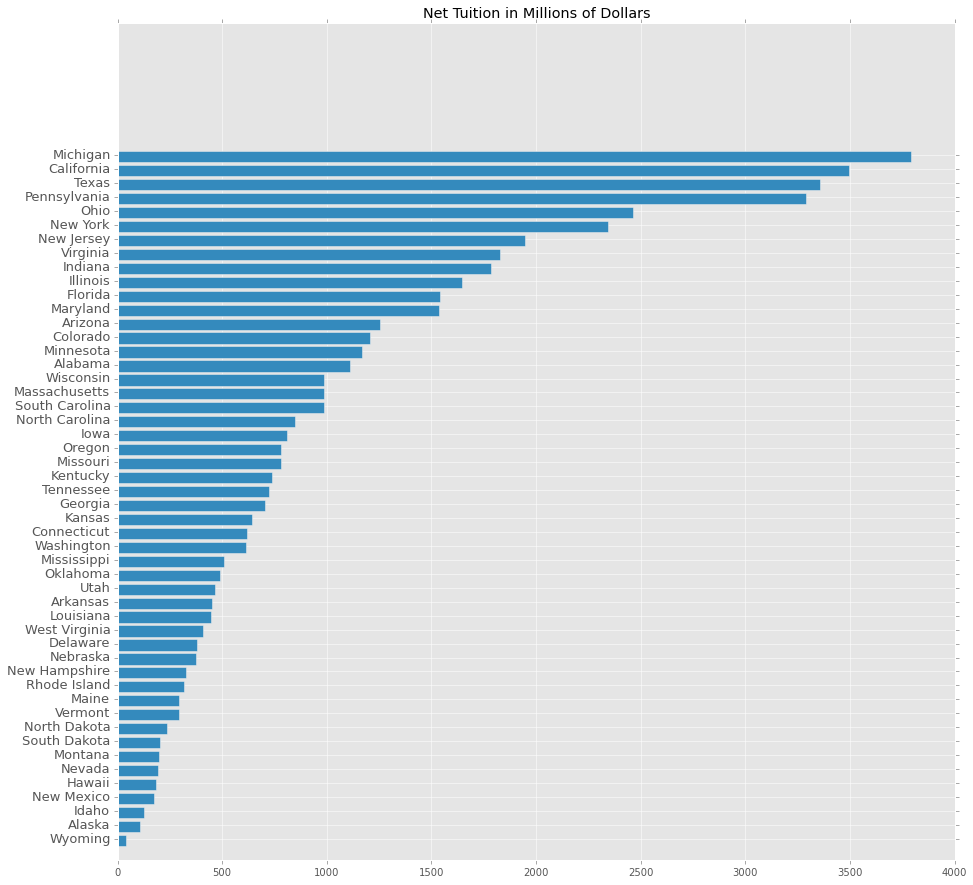

In [970]:
b = list(state_investment['Net Tuition'].astype(float))
ind= sorted(range(len(b)), key=lambda k: -b[k])
b.sort(reverse=True)
plt.figure(figsize=(15,15))
plt.barh([50-i for i in index], b)
plt.yticks([50-i+0.5 for i in index], [list(state_investment['State'])[i] for i in ind],fontsize = 13)
plt.title('Net Tuition in Millions of Dollars')
plt.show()

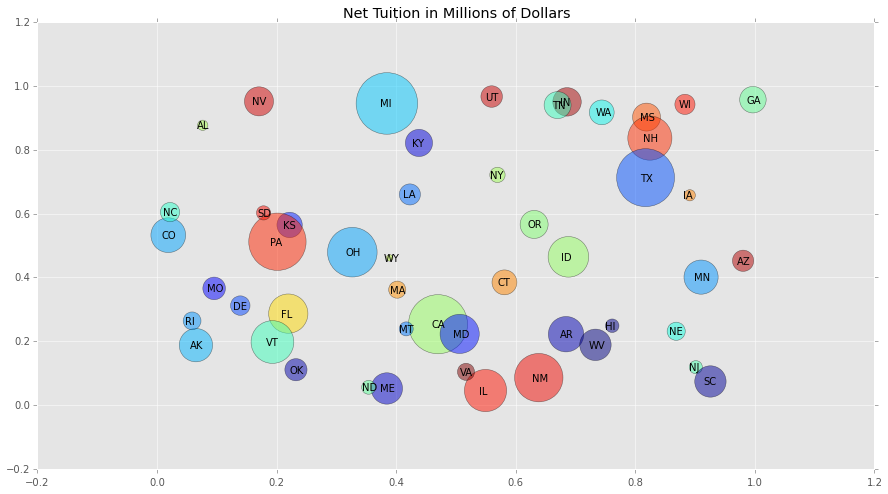

In [971]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.array(state_investment['Net Tuition'].astype(float))
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, s=area  ,edgecolor='k', c=colors, alpha=0.5)
for i in arange(50):
    ax.annotate(us_states['StateCode'][i], xy=(x[i], y[i]), xytext=(x[i]-0.01, y[i]-0.01))
plt.title('Net Tuition in Millions of Dollars')
plt.show()

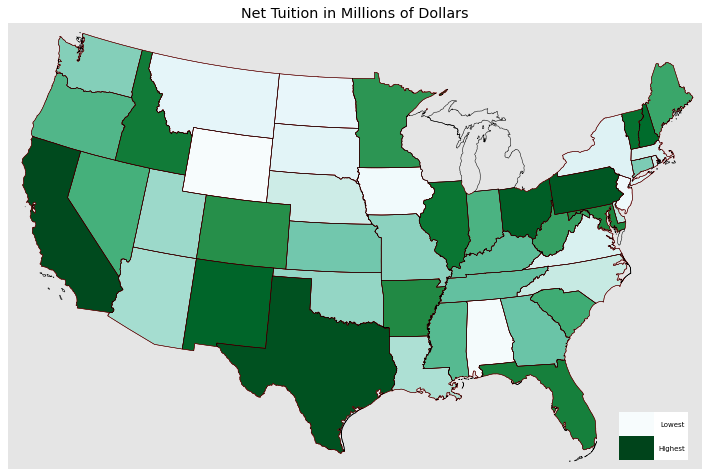

In [979]:
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)
b = list(state_investment['Net Tuition'].astype(float))
ind= sorted(range(len(b)), key=lambda k: b[k])
colors = plt.cm.BuGn(np.linspace(0, 1, 50))
colors2 = plt.cm.BuGn(np.linspace(0, 1, 2))
table_vals=[['Lowest'],['Highest']]
# the rectangle is where I want to place the table
the_table = plt.table(cellText=table_vals,
                  colWidths = [0.1],
                  rowColours=colors2,
                  loc='lower right')
the_table.set_fontsize(20)
the_table.scale(0.5, 2)
for key, cell in the_table.get_celld().items():
    cell.set_linewidth(0)
# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon
for i in np.arange(50):
    seg = map.states[state_names.index(us_states['StateName'][ind[i]])]
    poly = Polygon(seg, facecolor=colors[i],edgecolor='red')
    ax.add_patch(poly)
plt.title('Net Tuition in Millions of Dollars')
plt.show()

### Vermont, New Hampshire and Rhode Island charge the highest net tuition as percent of total education revenue. 

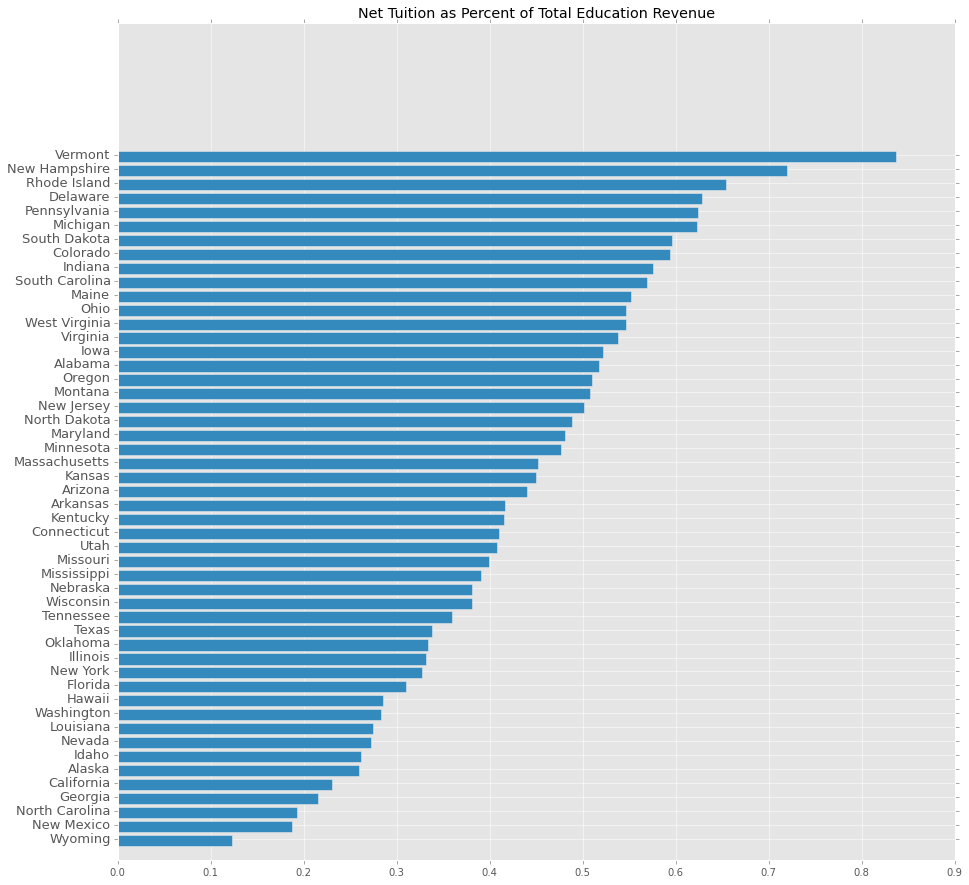

In [974]:
b = list(state_investment['Net Tuition as Percent of Total Education Revenue'].astype(float))
ind= sorted(range(len(b)), key=lambda k: -b[k])
b.sort(reverse=True)
plt.figure(figsize=(15,15))
plt.barh([50-i for i in index], b)
plt.yticks([50-i+0.5 for i in index], [list(state_investment['State'])[i] for i in ind],fontsize = 13)
plt.title('Net Tuition as Percent of Total Education Revenue')
plt.show()

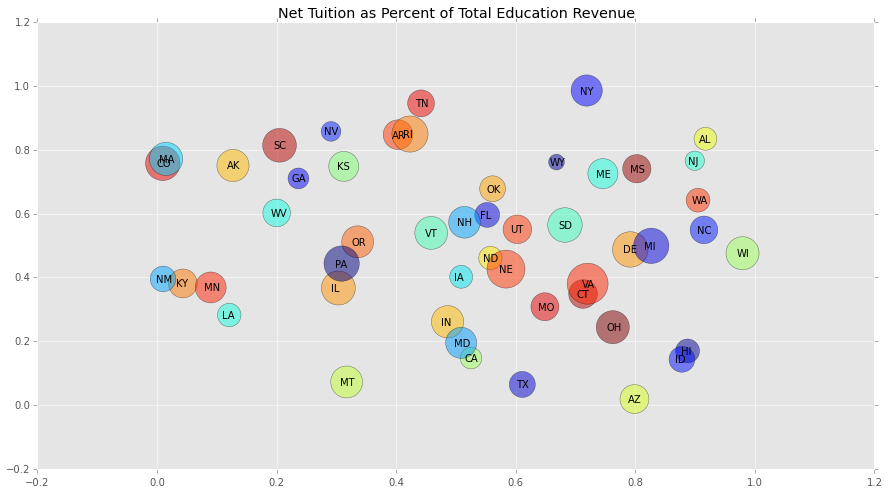

In [947]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.array(state_investment['Net Tuition as Percent of Total Education Revenue'].astype(float))
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x, y, s=area*2000  ,edgecolor='k', c=colors, alpha=0.5)
for i in arange(50):
    ax.annotate(us_states['StateCode'][i], xy=(x[i], y[i]), xytext=(x[i]-0.01, y[i]-0.01))
plt.title('Net Tuition as Percent of Total Education Revenue')
plt.show()


## VII, Conclusion
### Overall, the number of degrees have increased three fold in the past four decades. Women have overtaken men at all level of higher education and the gap is widening. The percentage of college graduation among minorities has also improved significantly. The cost of education has rocketed more than ten times, with the fringe benefits and administrative costs increasing most dramatically. Institutions rely increasingly on part-time staff. The amount of federal support also rose sharply after 2008.  